In [1]:
from PIL import Image
import geopandas as gpd
import predicting_unemployement
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm

In [2]:
allFeatures, lsoa_codes = predicting_unemployement.makeAllFeatures()
allFeatures = allFeatures[allFeatures.index > "2018-12-10"]



In [3]:
def geoPaths()->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    return dc2.joinpath("data/unzipped/map")

mapDir = geoPaths()
barnetLSOA = mapDir.joinpath("barnet_lsoa.geojson")
barnet_map = gpd.read_file(barnetLSOA)
barnet_map= barnet_map[['geometry', 'lsoa11cd']]
barnet_map.rename(columns={'lsoa11cd': 'LSOA code'}, inplace=True)


In [4]:
y = allFeatures[lsoa_codes].copy()
y = y.astype("float32")
X = allFeatures.drop(columns= lsoa_codes)
np.max(y.max())

85.0

In [5]:
predictions = {}
for code in lsoa_codes:
    model = xgb.XGBRegressor()
    model.load_model(predicting_unemployement.modelPath(code))
    predictions[f"{code}"] = model.predict(X.values)


predictionDF = pd.DataFrame(predictions, index=pd.to_datetime(list(X.index)))

predictionDF = predictionDF.T
predictionDF = predictionDF.reset_index()
predictionDF = predictionDF.rename(columns={"index":"LSOA code"})


In [6]:
y = y.T
y.columns = pd.to_datetime(y.columns)
monthList = y.columns

y = y.reset_index()
y = y.rename(columns = {"index":'LSOA code'})
# merged = pd.merge(y,)

In [7]:
trueMerged = pd.merge(barnet_map, y, on = ["LSOA code"] )
trueMerged

geometry  LSOA code  \
0    POLYGON ((-0.13844 51.63652, -0.13534 51.63512...  E01000115   
1    POLYGON ((-0.14836 51.63712, -0.14759 51.63628...  E01000116   
2    POLYGON ((-0.15362 51.63381, -0.15445 51.63321...  E01000117   
3    POLYGON ((-0.15155 51.63453, -0.14967 51.63363...  E01000118   
4    POLYGON ((-0.13399 51.63405, -0.13395 51.63361...  E01000119   
..                                                 ...        ...   
204  POLYGON ((-0.17462 51.62222, -0.17482 51.62145...  E01000320   
205  POLYGON ((-0.17381 51.62378, -0.17374 51.62305...  E01000321   
206  POLYGON ((-0.17609 51.61923, -0.17609 51.61873...  E01000322   
207  POLYGON ((-0.17189 51.61706, -0.17212 51.61653...  E01000323   
208  POLYGON ((-0.16442 51.61710, -0.16345 51.61643...  E01000324   

     2019-01-01 00:00:00  2019-02-01 00:00:00  2019-03-01 00:00:00  \
0                    5.0                  5.0                  5.0   
1                   10.0                 10.0                 10.0   
2                   15.0                 15.0                 15.0   
3                   20.0                 25.0                 25.0   
4                    5.0                 10.0                 10.0   
..                   ...                  ...                  ...   
204                 10.0                 15.0                 15.0   
205                 25.0                 30.0                 30.0   
206                 20.0                 25.0                 20.0   
207                 60.0                 65.0                 60.0   
208                 15.0                 15.0                 15.0   

     2019-04-01 00:00:00  2019-05-01 00:00:00  2019-06-01 00:00:00  \
0                    5.0                 10.0                 10.0   
1                   10.0                 10.0                  5.0   
2                   20.0                 20.0                 20.0   
3                   25.0                 20.0                 20.0   
4                   10.0                 15.0                 15.0   
..                   ...                  ...                  ...   
204                 15.0                 15.0                 15.0   
205                 30.0                 30.0                 30.0   
206                 25.0                 25.0                 30.0   
207                 65.0                 70.0                 65.0   
208                 15.0                 15.0                 20.0   

     2019-07-01 00:00:00  2019-08-01 00:00:00  2019-09-01 00:00:00  \
0                   10.0                 10.0                 10.0   
1                   10.0                 10.0                  5.0   
2                   15.0                 15.0                 15.0   
3                   20.0                 20.0                 15.0   
4                   10.0                 10.0                 10.0   
..                   ...                  ...                  ...   
204                 20.0                 15.0                 15.0   
205                 35.0                 35.0                 45.0   
206                 35.0                 35.0                 25.0   
207                 70.0                 70.0                 65.0   
208                 25.0                 20.0                 25.0   

     2019-10-01 00:00:00  2019-11-01 00:00:00  2019-12-01 00:00:00  
0                   10.0                 10.0                 10.0  
1                    5.0                  5.0                 10.0  
2                   15.0                 15.0                 15.0  
3                   20.0                 20.0                 20.0  
4                   15.0                 15.0                 15.0  
..                   ...                  ...                  ...  
204                 15.0                 20.0                 25.0  
205                 45.0                 50.0                 45.0  
206                 20.0                 20.0                 20.0  
207 

In [8]:
predMerged = pd.merge(barnet_map, predictionDF, on = ["LSOA code"])
predMerged

geometry  LSOA code  \
0    POLYGON ((-0.13844 51.63652, -0.13534 51.63512...  E01000115   
1    POLYGON ((-0.14836 51.63712, -0.14759 51.63628...  E01000116   
2    POLYGON ((-0.15362 51.63381, -0.15445 51.63321...  E01000117   
3    POLYGON ((-0.15155 51.63453, -0.14967 51.63363...  E01000118   
4    POLYGON ((-0.13399 51.63405, -0.13395 51.63361...  E01000119   
..                                                 ...        ...   
204  POLYGON ((-0.17462 51.62222, -0.17482 51.62145...  E01000320   
205  POLYGON ((-0.17381 51.62378, -0.17374 51.62305...  E01000321   
206  POLYGON ((-0.17609 51.61923, -0.17609 51.61873...  E01000322   
207  POLYGON ((-0.17189 51.61706, -0.17212 51.61653...  E01000323   
208  POLYGON ((-0.16442 51.61710, -0.16345 51.61643...  E01000324   

     2019-01-01 00:00:00  2019-02-01 00:00:00  2019-03-01 00:00:00  \
0               5.000204             5.080205             5.069761   
1               9.999634            10.000356            10.000231   
2              17.413189            14.999679            15.000622   
3              19.999826            24.999090            25.000257   
4               4.999813             9.999477            10.000258   
..                   ...                  ...                  ...   
204            10.000157            14.999721            15.000644   
205            24.999947            29.999758            30.855276   
206            20.000099            19.646845            20.000538   
207            60.000328            59.064953            60.000179   
208            14.999838            14.999754            15.000495   

     2019-04-01 00:00:00  2019-05-01 00:00:00  2019-06-01 00:00:00  \
0               5.000065             9.999650            10.000115   
1               6.385831             9.999809             5.000296   
2              19.999943            19.999678            19.999884   
3              24.999823            19.999979            20.000080   
4              10.000331            14.999621            15.000162   
..                   ...                  ...                  ...   
204            14.999901            14.999973            17.999315   
205            30.000296            30.000069            31.678518   
206            24.999802            24.999718            27.294582   
207            64.999817            63.633873            64.999908   
208            15.000102            14.706674            18.601881   

     2019-07-01 00:00:00  2019-08-01 00:00:00  2019-09-01 00:00:00  \
0              10.000010            10.000051             9.999610   
1               7.178592             9.999871             5.000483   
2              15.000256            15.000378            14.999616   
3              20.000189            20.190723            15.000181   
4              10.000500             9.999843            10.000219   
..                   ...                  ...                  ...   
204            19.999798            15.000343            16.863981   
205            35.000469            34.999905            44.887676   
206            34.999325            34.999302            25.000357   
207            69.999992            69.999535            65.000023   
208            25.000027            20.000217            24.999458   

     2019-10-01 00:00:00  2019-11-01 00:00:00  2019-12-01 00:00:00  
0              10.018159             9.999838             9.078880  
1               5.000182             4.999972             9.998774  
2              15.000322            16.722527            17.018057  
3              19.999262            18.719378            20.000223  
4              14.999790            15.000210            15.000260  
..                   ...                  ...                  ...  
204            19.928228            20.000072            24.998665  
205            44.999893            49.998753            44.999958  
206            20.000032            20.000694            19.999739  
207 

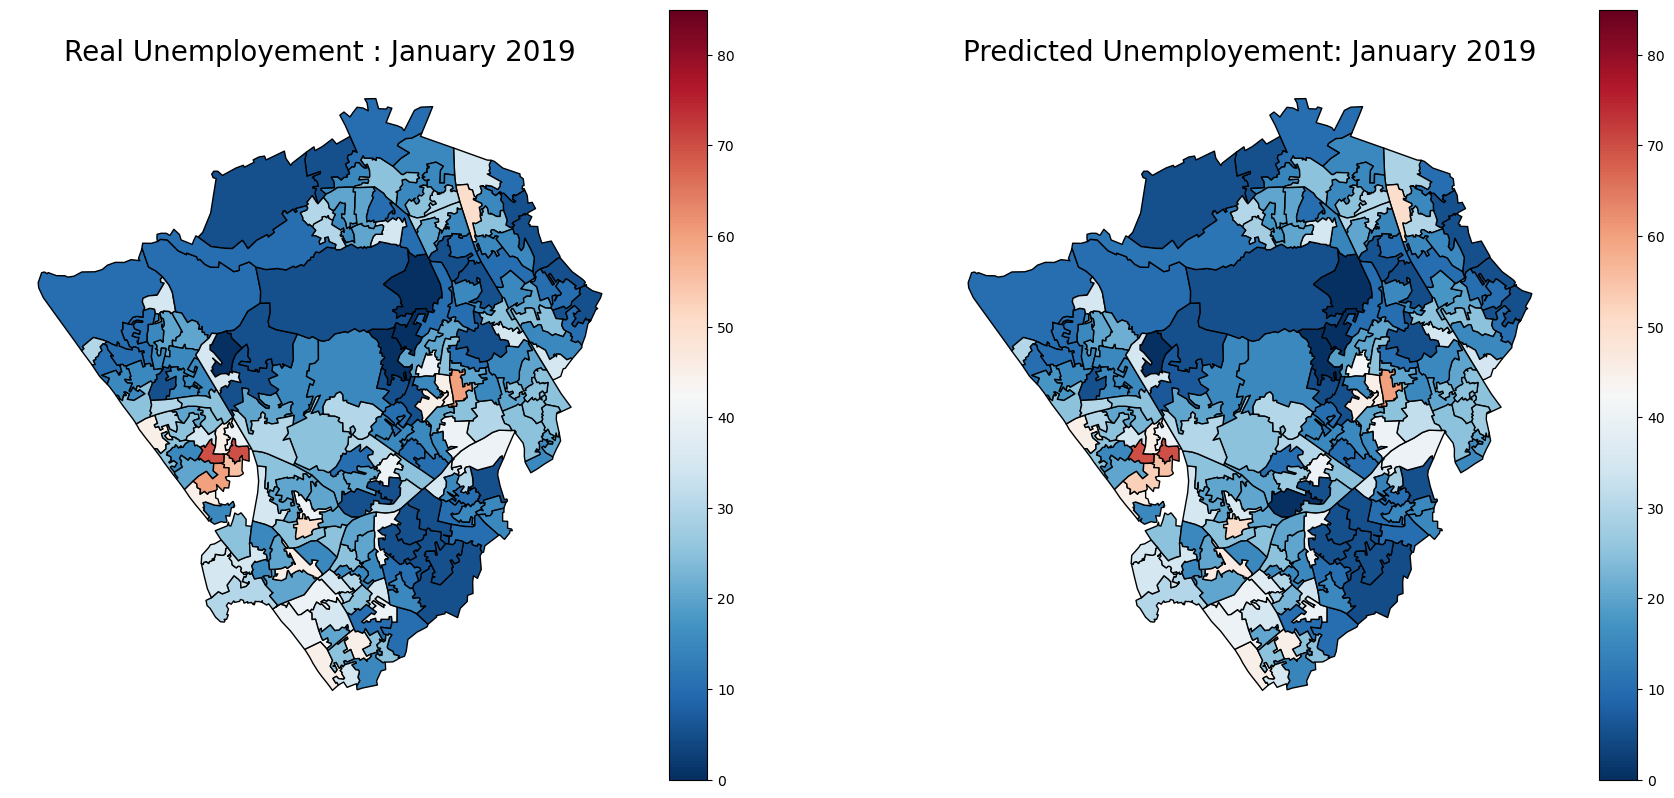

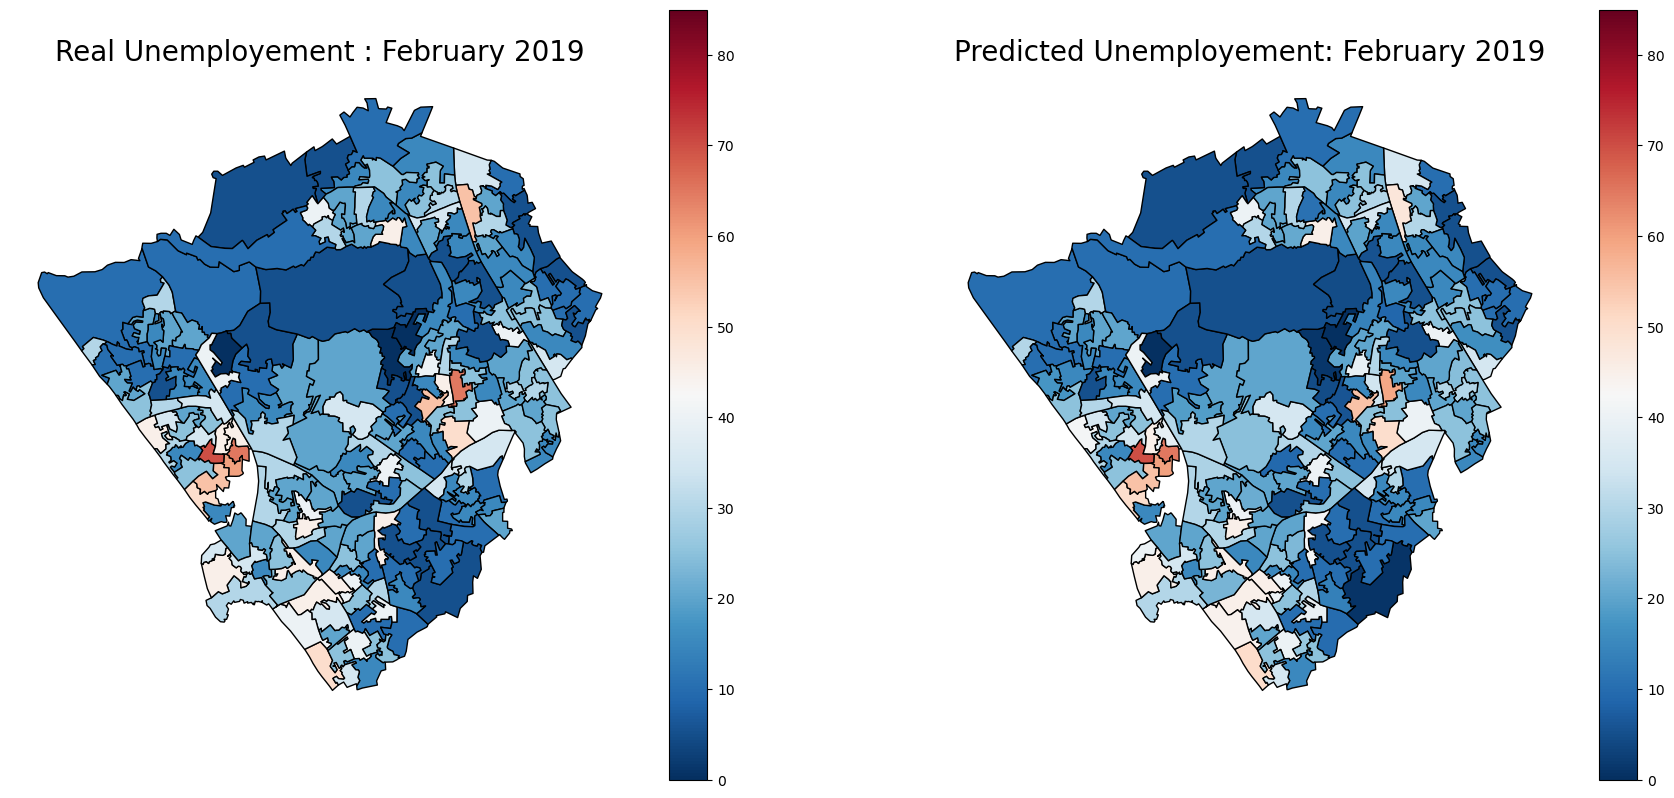

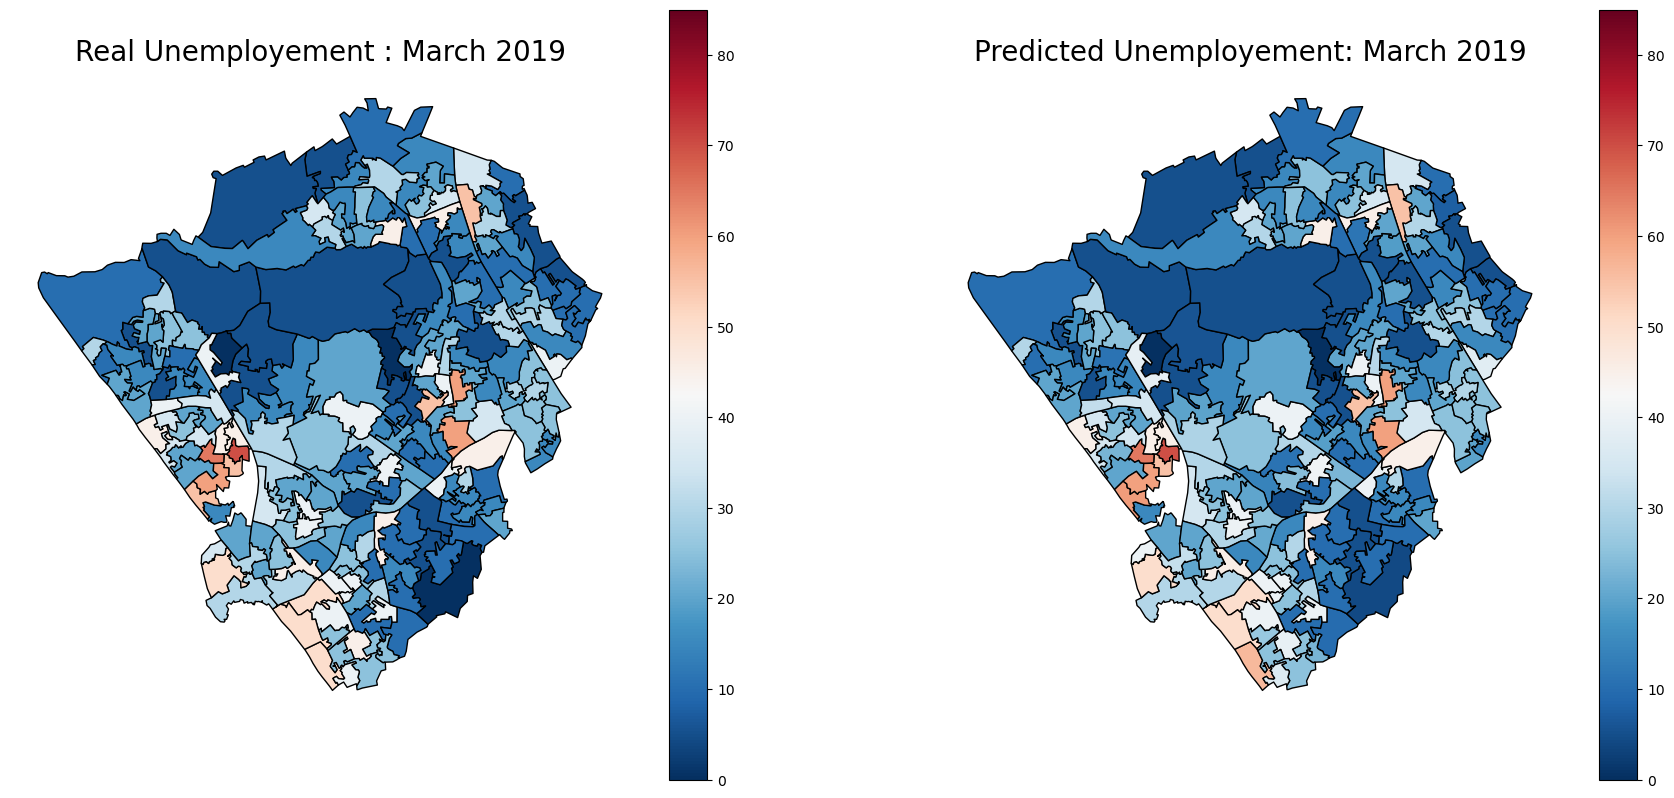

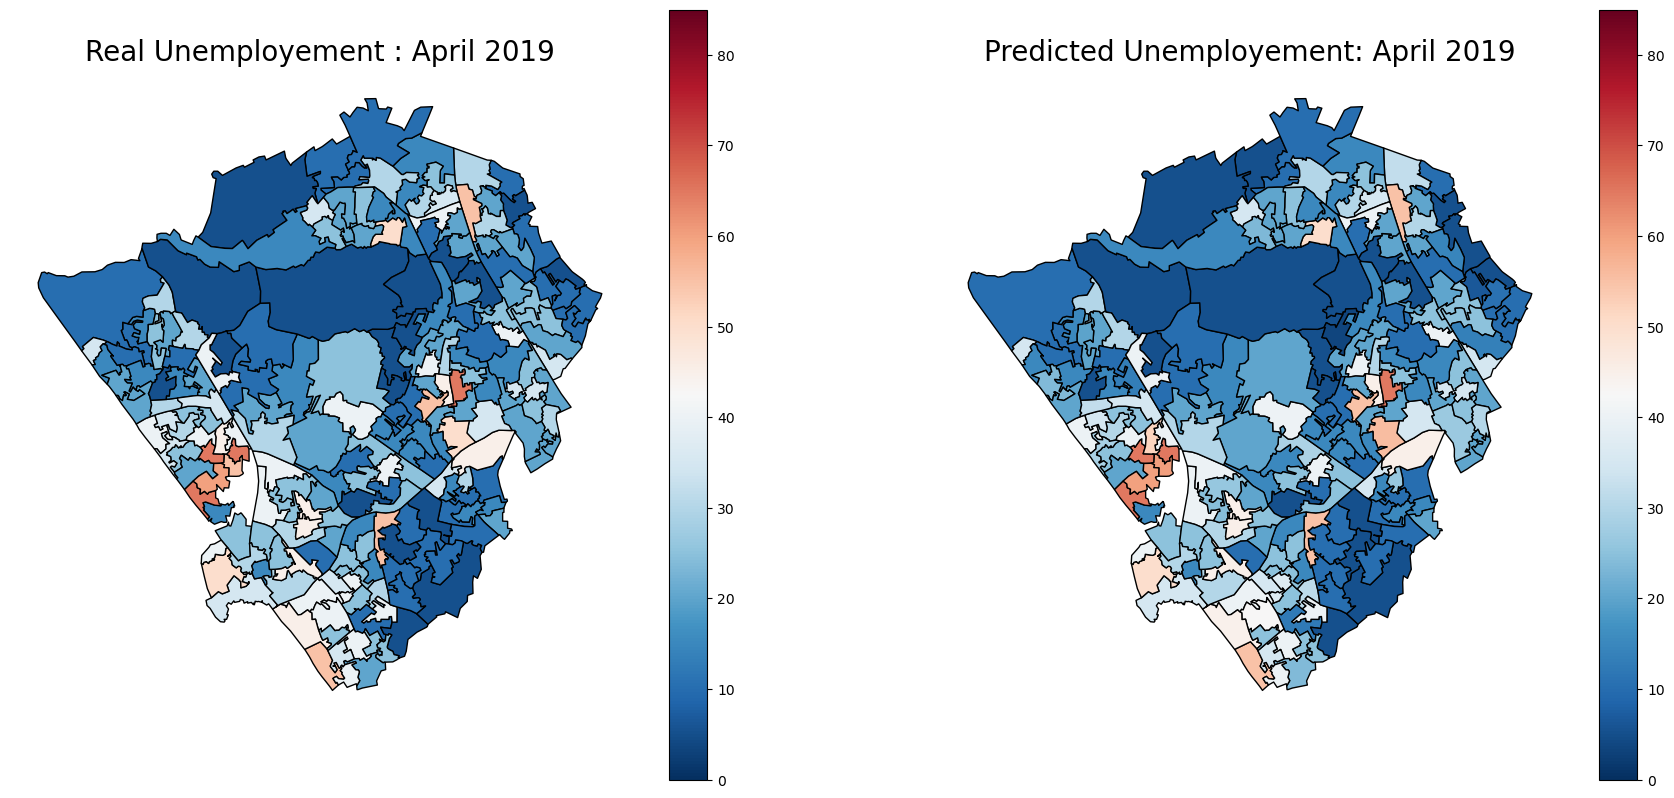

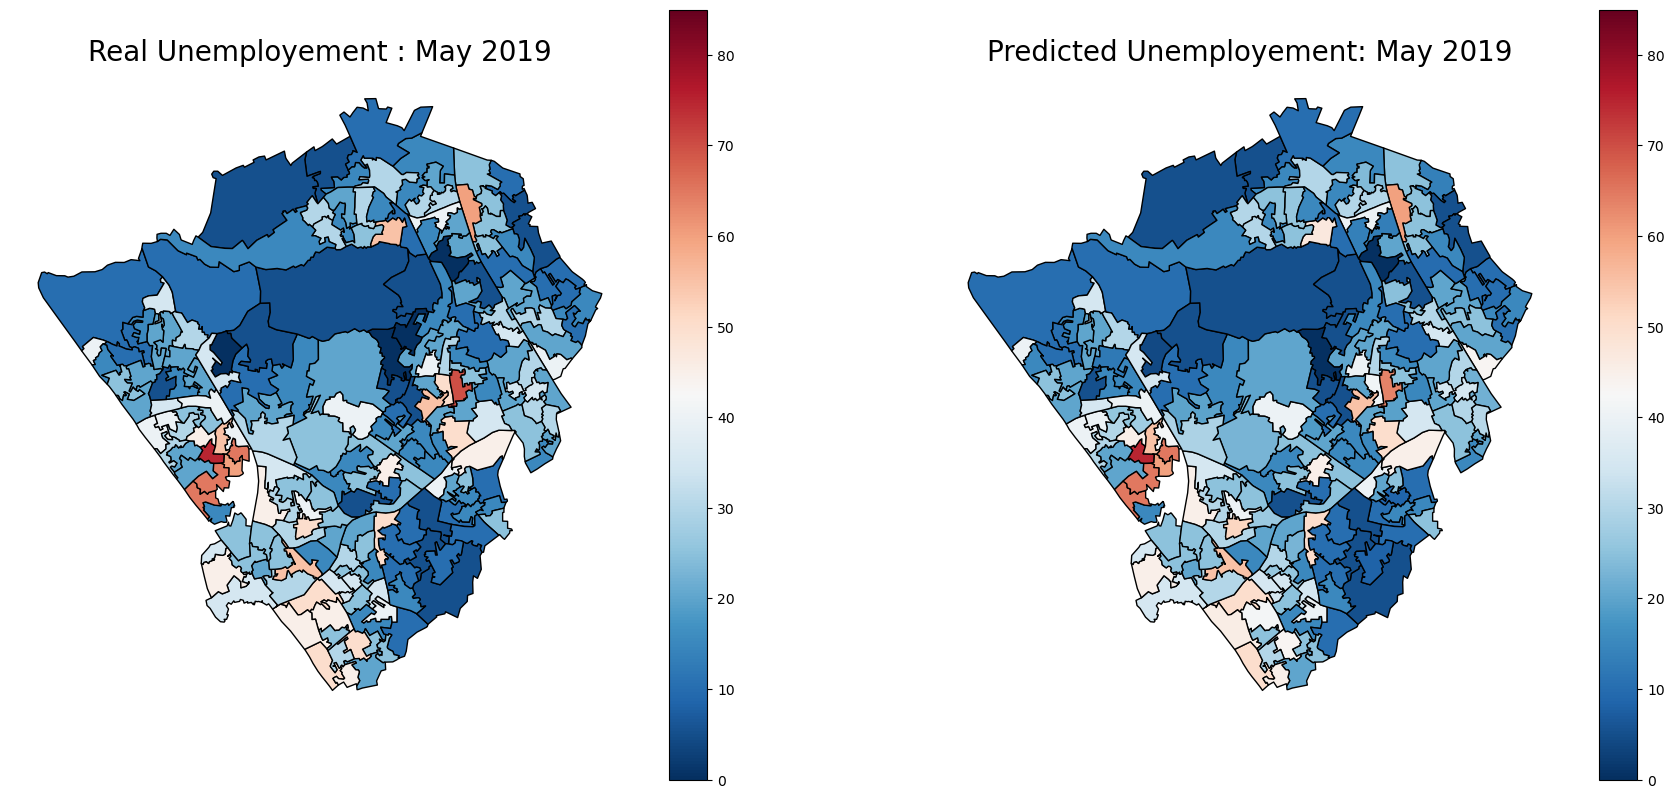

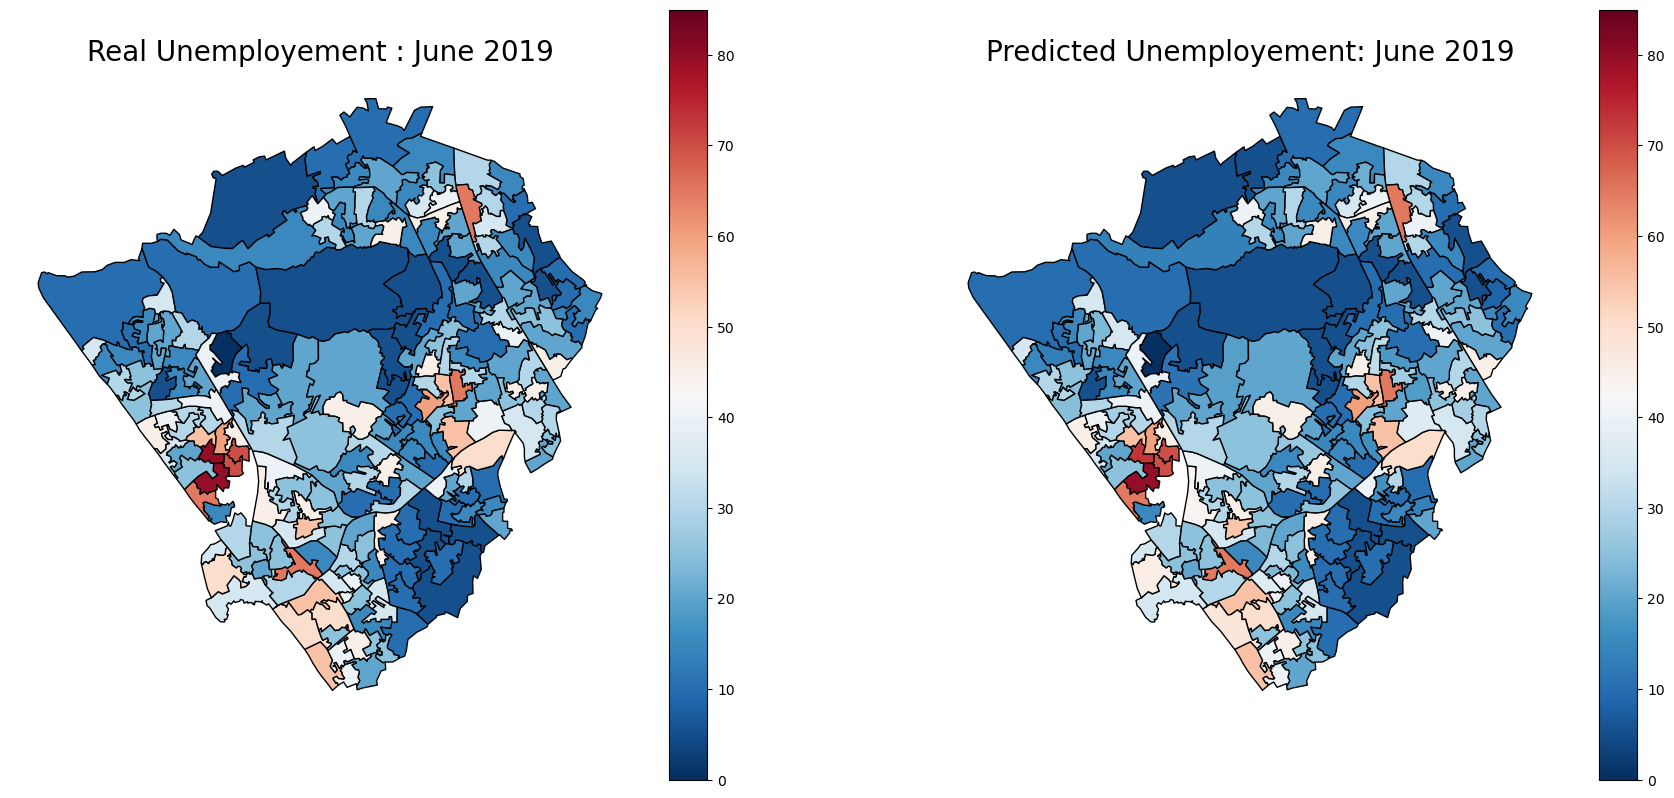

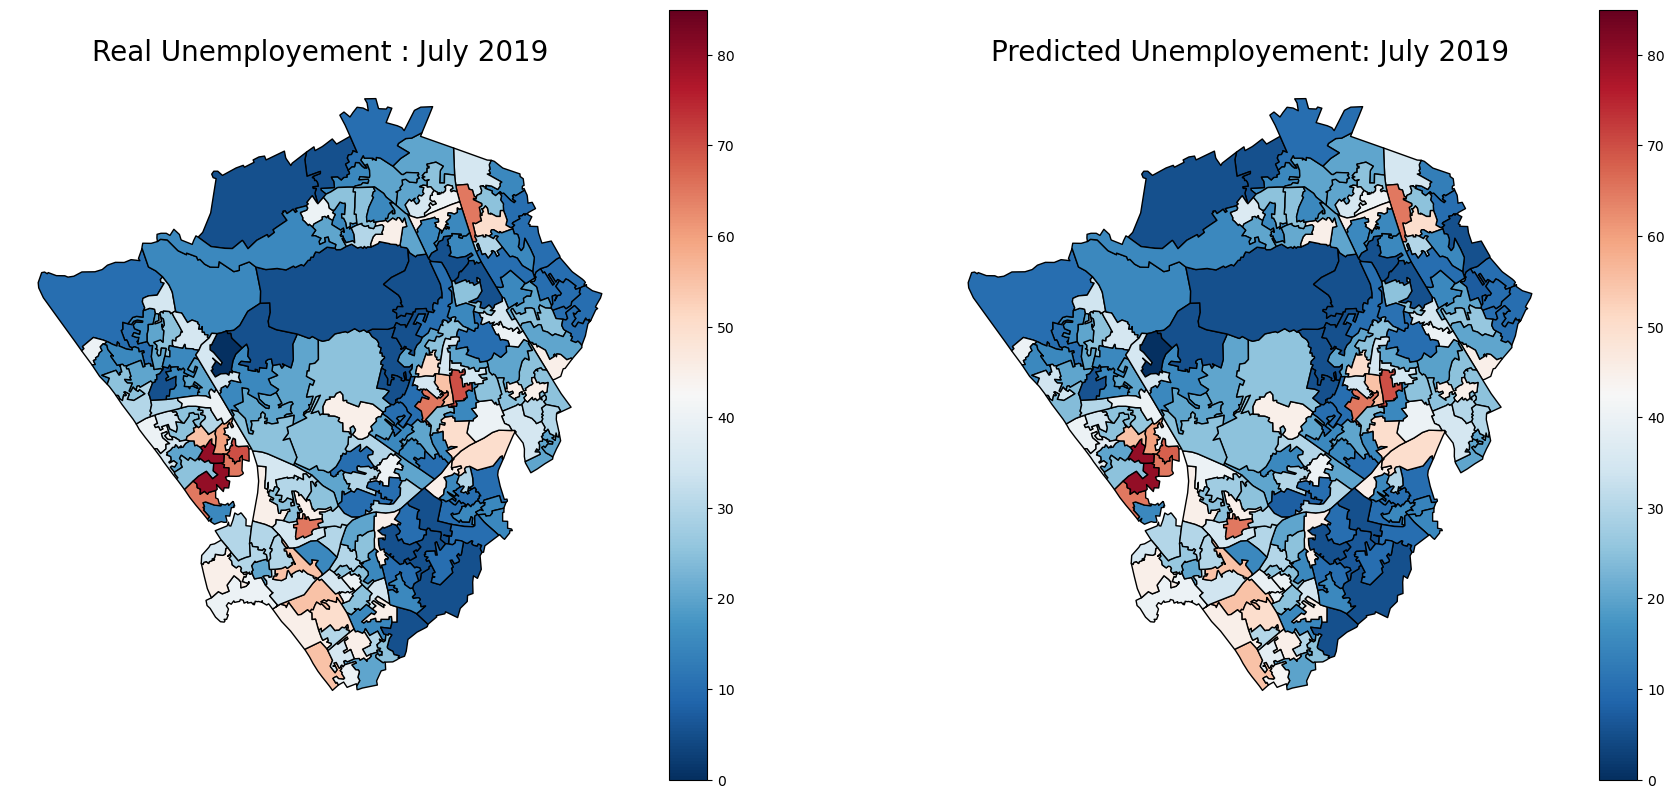

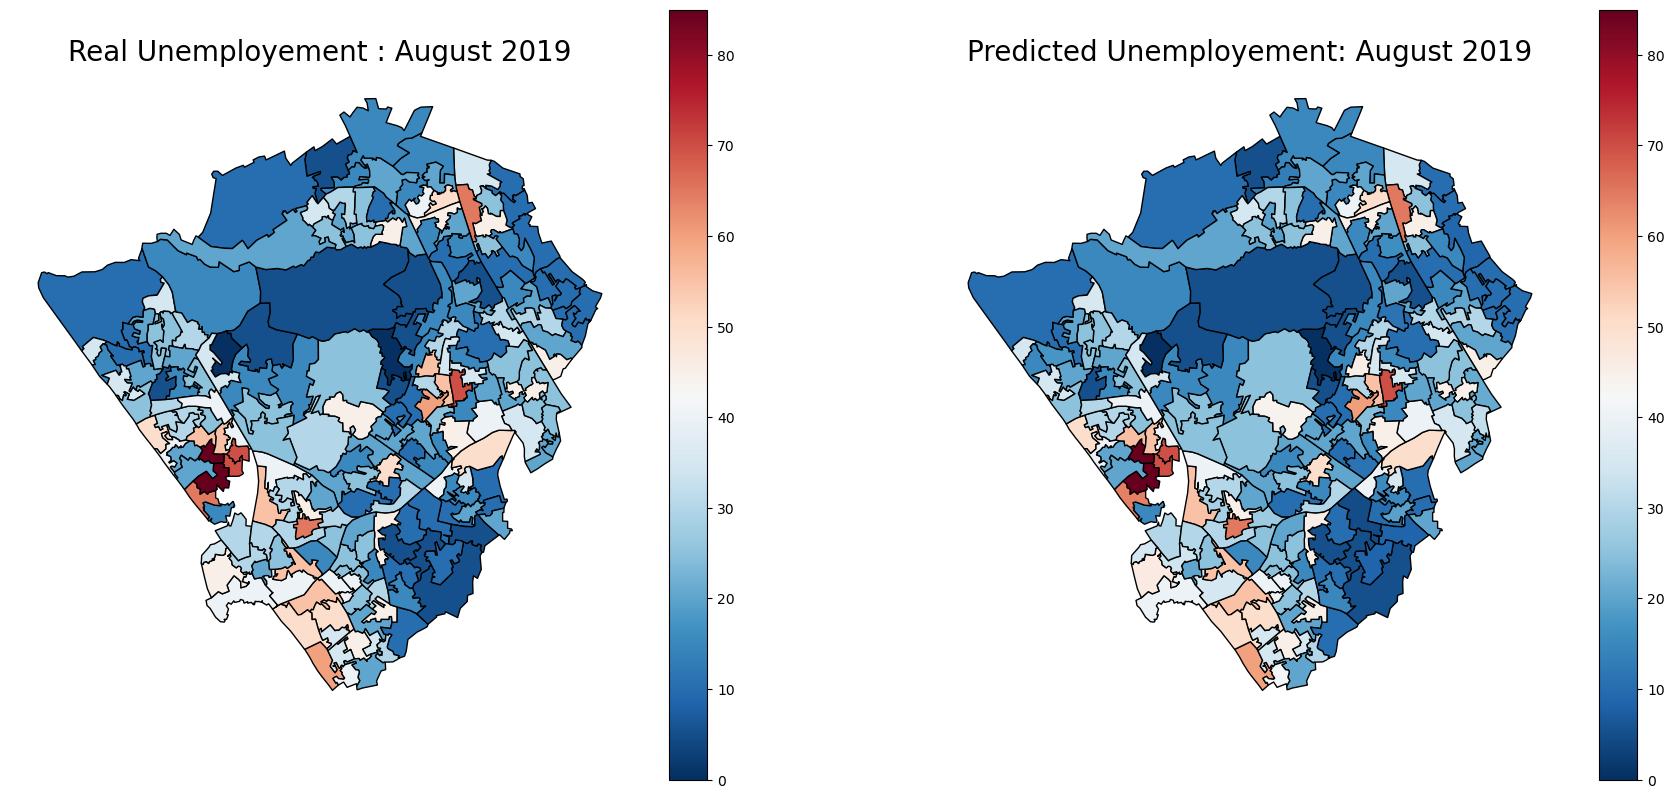

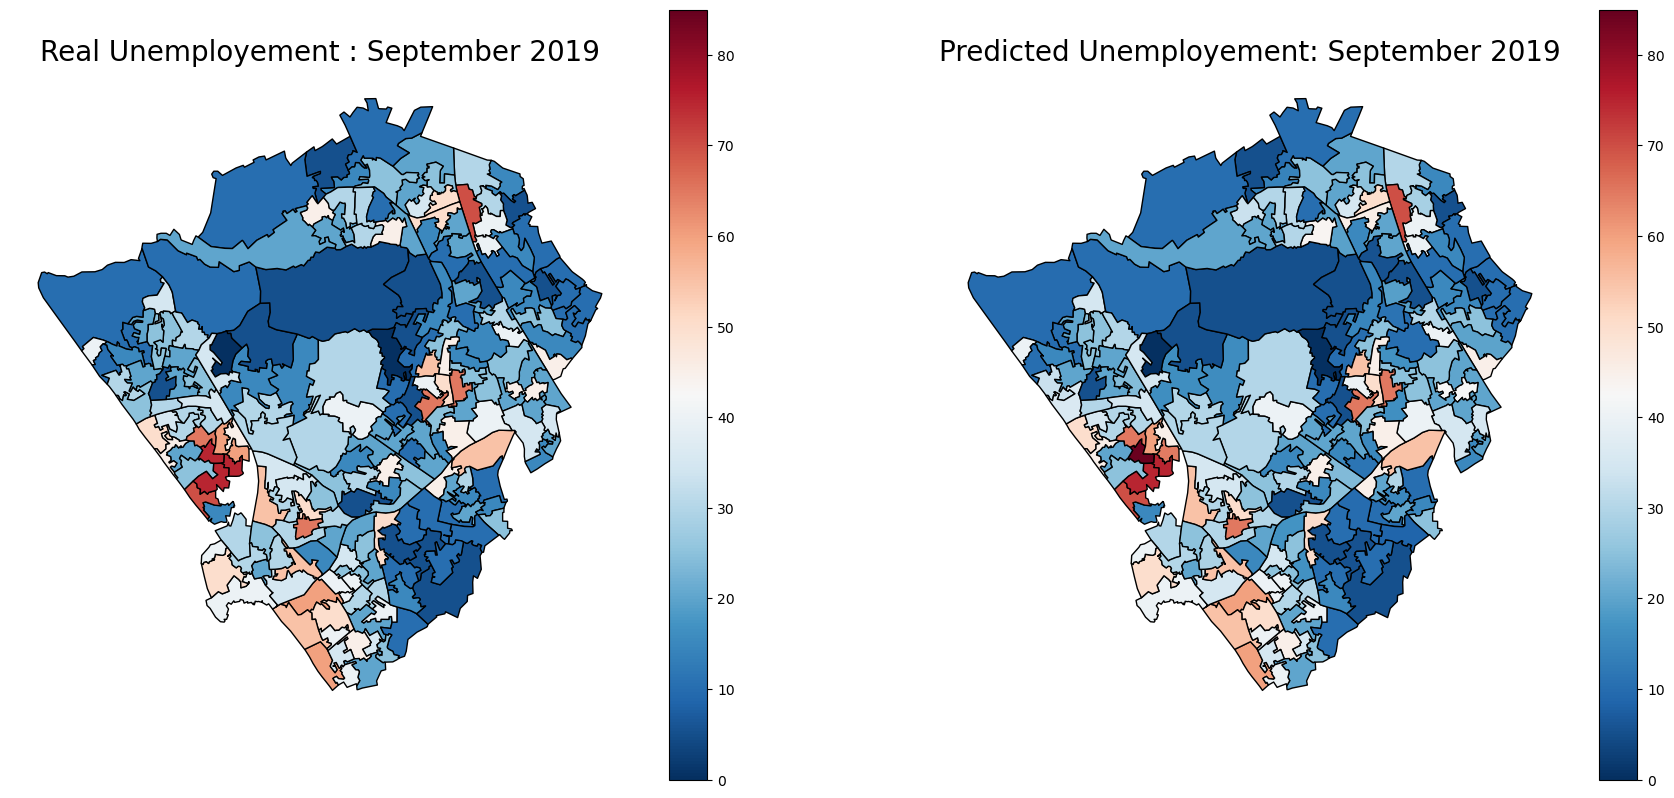

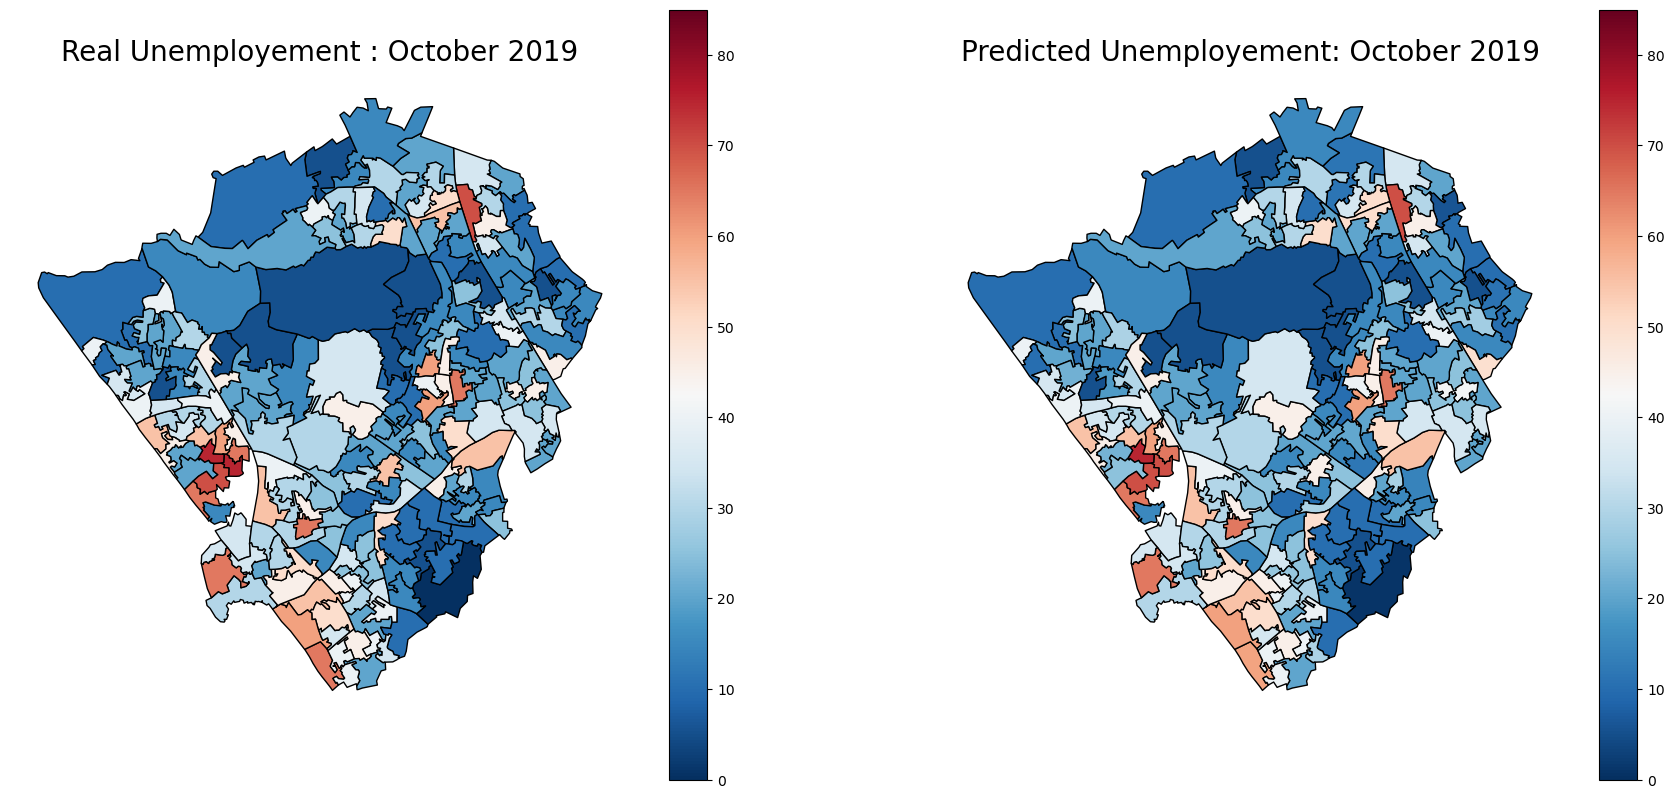

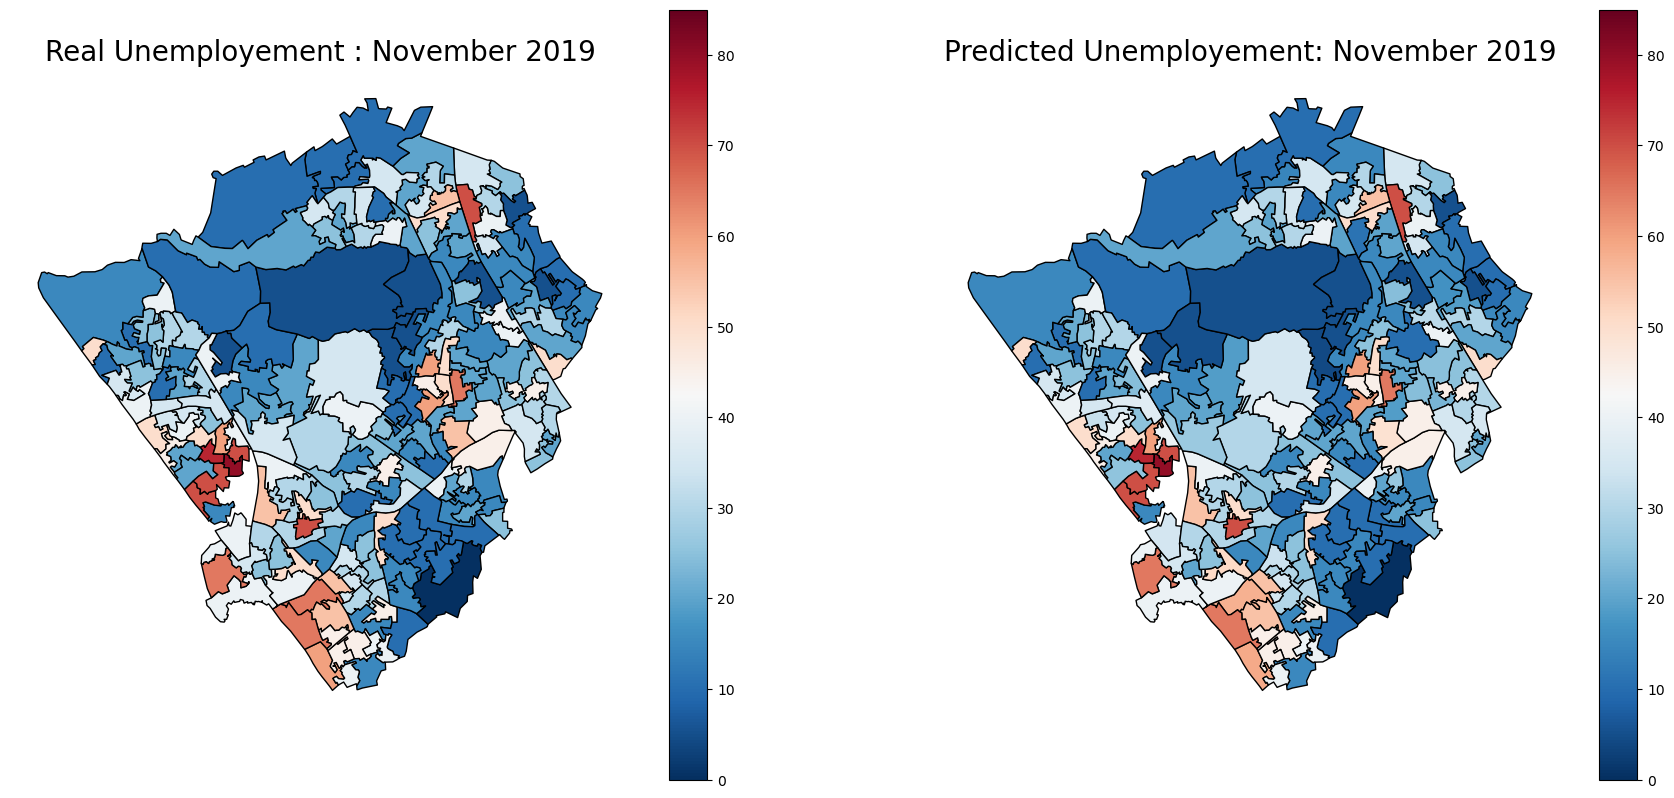

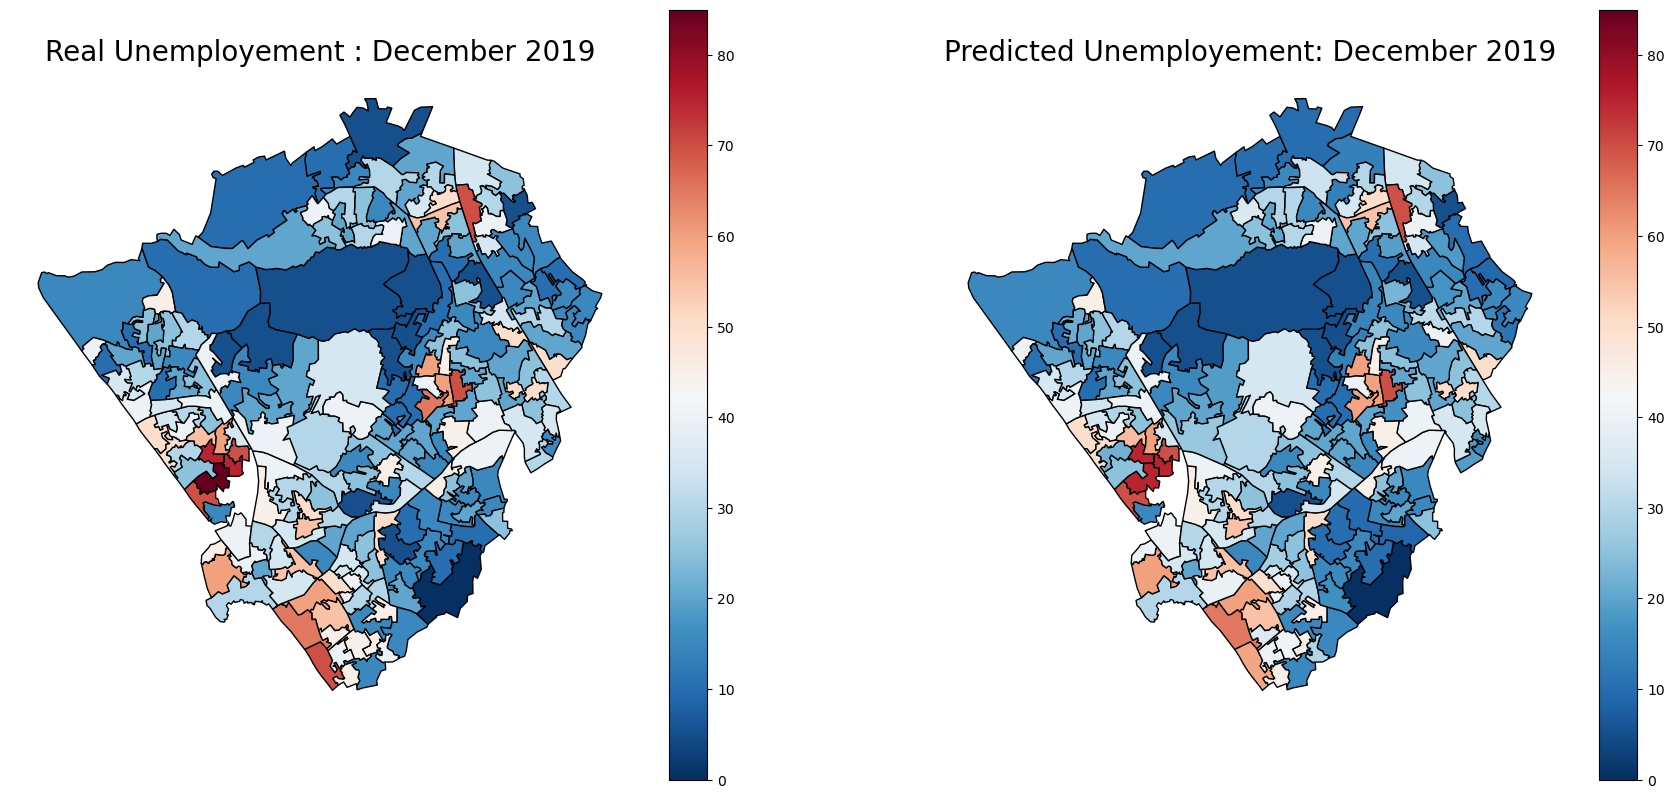

In [9]:
month_dictionary = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
cwd = Path.cwd()
dc2 = cwd.parent
predSide = dc2.joinpath("data/img/unemployement")
frames = []
for month in monthList:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
    trueMerged.plot(column=month, cmap="RdBu_r", edgecolors="black", vmin=0, vmax=85, legend=True, norm=plt.Normalize(vmin=0, vmax=85), ax=ax1)
    predMerged.plot(column=month, cmap="RdBu_r", edgecolors="black", vmin=0, vmax=85, legend=True, norm=plt.Normalize(vmin=0, vmax=85), ax=ax2)
    ax1.set_title(f"Real Unemployement : {month_dictionary[month.month]} {month.year}", fontsize = 20)
    ax2.set_title(f"Predicted Unemployement: {month_dictionary[month.month]} {month.year}", fontsize = 20)
    ax1.axis("off")
    ax2.axis("off")
    chart = fig.get_figure()
    frames.append(predSide.joinpath(f"{month}.png"))
    chart.savefig(predSide.joinpath(f"{month}"))


In [10]:
fs = []
for file in frames:
    image = Image.open(file)
    fs.append(image)
fs[0].save(predSide.joinpath("unemployement_2019.gif"), format="GIF", append_images=fs[1:], save_all=True, duration=2000, loop=0)
